In [46]:
# Classifying Newswires: A Multiclass Classification Example


In [47]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [48]:
# Decoder function to get words from newswires

def decode_news(newswire):
    word_index = reuters.get_word_index()
    reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
    
    decoded_newswire = ' '
    
    for i in newswire:
        decoded_newswire = decoded_newswire + ' ' + str(reversed_word_index.get(i-3, '?'))

    return decoded_newswire



In [49]:
# Vectorize data to feed using one-hot encoding 

import numpy as np

def vectorize(arr, dimension):
    ret_arr = np.zeros((len(arr), dimension))
    for i, arr in enumerate(arr):
        ret_arr[i, arr] = 1.
    return ret_arr

data_train = vectorize(train_data, 10000)
data_test = vectorize(test_data, 10000)

label_train = vectorize(train_labels, 46)
label_test = vectorize(test_labels, 46)



In [50]:
# ATTEMPT 1

from keras import models
from keras import layers


# Define model object
model = models.Sequential()

# Add layers
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Take first 10000 of data_train to be the validation set
data_validation = data_train[:1000]
label_validation = label_train[:1000]

# Take the rest of data_train to be the training set
partial_data_train = data_train[1000:]
partial_label_train = label_train[1000:]

# Compile model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train model
history = model.fit(x=partial_data_train,
                    y=partial_label_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(data_validation, label_validation))


    
    
    
    
    
    

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 272us/step - loss: 2.5704 - acc: 0.5722 - val_loss: 1.8069 - val_acc: 0.6630
Epoch 2/9
7982/7982 [==============================] - 1s 175us/step - loss: 1.4658 - acc: 0.7261 - val_loss: 1.3569 - val_acc: 0.7120
Epoch 3/9
7982/7982 [==============================] - 1s 152us/step - loss: 1.0736 - acc: 0.7874 - val_loss: 1.1523 - val_acc: 0.7610
Epoch 4/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.8386 - acc: 0.8335 - val_loss: 1.0293 - val_acc: 0.7880
Epoch 5/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.6737 - acc: 0.8664 - val_loss: 0.9516 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.5489 - acc: 0.8923 - val_loss: 0.9115 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 178us/step - loss: 0.4543 - acc: 0.9094 - val_loss: 0.8731 - val_acc: 0.8240
Epoch 8

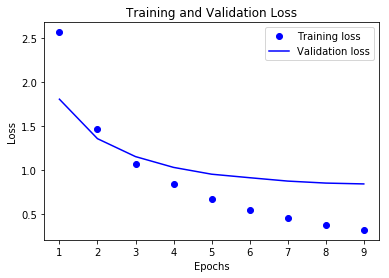

In [51]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

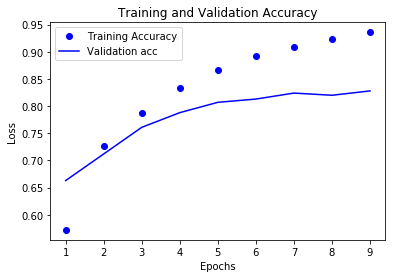

In [52]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [53]:
results = model.evaluate(data_test, label_test)

2246/2246 [==============================] - 1s 300us/step


In [54]:
print(results)

[0.9274310796046406, 0.7947462155472882]


In [55]:
predictions = model.predict(data_test)

predictions[0]

array([1.92252235e-04, 2.48532277e-04, 2.58896151e-04, 8.63955319e-01,
       1.22037940e-01, 1.20739278e-04, 1.98218069e-04, 2.40729423e-05,
       2.51548481e-03, 3.76460594e-05, 2.03663527e-04, 1.18474290e-03,
       2.13997424e-04, 3.16329533e-04, 5.05742719e-05, 4.84077864e-05,
       1.87296583e-03, 2.00083305e-04, 1.03883256e-04, 1.23636727e-03,
       6.70635316e-04, 6.61648461e-04, 6.07954207e-05, 1.97299974e-04,
       1.69714272e-04, 1.16481388e-04, 5.35350373e-05, 1.80944480e-05,
       3.07130598e-04, 2.63196474e-04, 1.91089872e-04, 3.71060887e-04,
       1.16497162e-04, 2.36321084e-05, 6.45665568e-04, 3.67149078e-05,
       2.01410017e-04, 1.95384462e-04, 3.32205673e-05, 3.69811547e-04,
       2.25199146e-05, 1.44282647e-04, 2.71639947e-05, 6.41245788e-05,
       1.27440317e-05, 6.06558206e-06], dtype=float32)

In [56]:
np.argmax(predictions[0])

3

In [ ]:
Summary:
    
If you're trying to classify data points among N classes, your network should end with a Dense layer of size N

In a single-label, multiclass classification problem, your networks should end with a softmax activation for 
N classes

Categorical cross entropy is almost always the sloss function you should use in these problems, as it minimizes
the distance between the probability distributions output by the netwowk and the true distribution of the targets

There are two ways to handle labels in multiclass classification:
    1) Encoding the labels via one-hot encoding
    2) Encoding the labels as integers and suing the sparse_categorical_crossentropy loss function 
    
If you need to classify data into a large number of categories 